In [23]:
from MRF import *
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_data.csv")

In [60]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), oos_pos=np.arange(150,200),trend_push=4,quantile_rate=0.3)

In [61]:
mrf_output = MRF._ensemble_loop()

Tree 0 out of 50


/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:284: RuntimeWarning: divide by zero encountered in long_scalars
  self.avg_beta = ((b-1)/b)*np.array(self.avg_pred) + \
/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:284: RuntimeWarning: invalid value encountered in multiply
  self.avg_beta = ((b-1)/b)*np.array(self.avg_pred) + \
/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:285: RuntimeWarning: divide by zero encountered in long_scalars
  (1/b)*self.rt_output['pred']


Tree 1 out of 50
Tree 2 out of 50
Tree 3 out of 50
Tree 4 out of 50
Tree 5 out of 50
Tree 6 out of 50
Tree 7 out of 50
Tree 8 out of 50
Tree 9 out of 50
Tree 10 out of 50
Tree 11 out of 50
Tree 12 out of 50
Tree 13 out of 50
Tree 14 out of 50
Tree 15 out of 50
Tree 16 out of 50
Tree 17 out of 50
Tree 18 out of 50
Tree 19 out of 50
Tree 20 out of 50
Tree 21 out of 50
Tree 22 out of 50
Tree 23 out of 50
Tree 24 out of 50
Tree 25 out of 50
Tree 26 out of 50
Tree 27 out of 50
Tree 28 out of 50
Tree 29 out of 50
Tree 30 out of 50
Tree 31 out of 50
Tree 32 out of 50
Tree 33 out of 50
Tree 34 out of 50
Tree 35 out of 50
Tree 36 out of 50
Tree 37 out of 50
Tree 38 out of 50
Tree 39 out of 50
Tree 40 out of 50
Tree 41 out of 50
Tree 42 out of 50
Tree 43 out of 50
Tree 44 out of 50
Tree 45 out of 50
Tree 46 out of 50
Tree 47 out of 50
Tree 48 out of 50
Tree 49 out of 50


/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:306: RuntimeWarning: invalid value encountered in true_divide
  self.avg_beta_nonOVF = self.avg_beta_nonOVF / \


In [62]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [63]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions.csv", index_col = "Unnamed: 0")

In [90]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [91]:
phils_preds.index = my_preds.index

In [92]:
my_preds.columns = np.arange(150, 200)

In [94]:
phils_preds.columns = my_preds.columns

Text(0.5, 1.0, 'R versus Python implementation: average of forecasts')

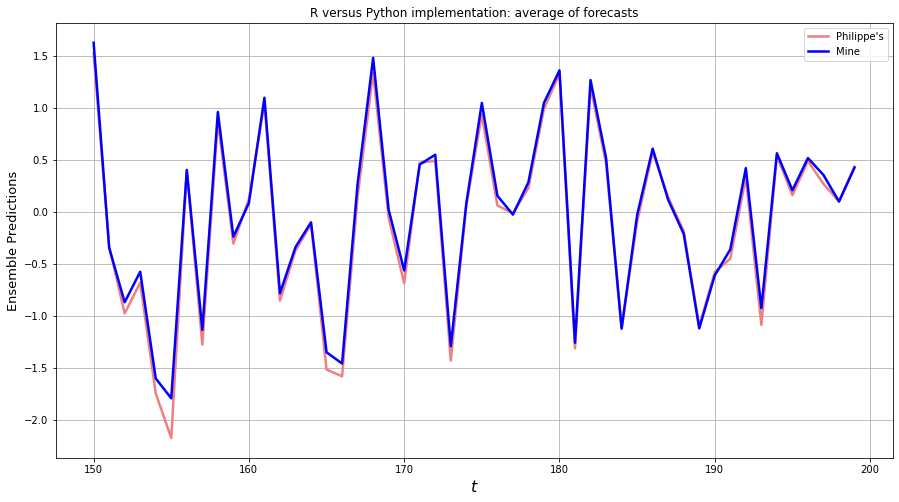

In [100]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
ax.plot(phils_preds.mean(axis =0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("R versus Python implementation: average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)